# Project: No show appointment Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project analyses data of the no show appointments in Brazil. This analysis will focus on finding what factors mostly affect the likeability of people not showing up based on the date and time of the appointment and some characteristics regarding the patient.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv.crdownload')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No


#### We start of with learning about the data

In [3]:
df.shape

(15088, 14)

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.508800e+04,1.508800e+04,15088.000000,15087.000000,15087.000000,15087.000000,15087.000000,15087.000000,15087.000000
mean,1.519596e+14,5.649254e+06,37.469910,0.084444,0.182740,0.061908,0.054285,0.020481,0.311129
std,2.624481e+14,6.733542e+04,22.205408,0.278061,0.386466,0.240996,0.226587,0.151153,0.462971
min,9.377953e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.258696e+12,5.621404e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.174353e+13,5.657944e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.412734e+13,5.697508e+06,54.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999350e+14,5.754683e+06,98.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15088 entries, 0 to 15087
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       15088 non-null  float64
 1   AppointmentID   15088 non-null  int64  
 2   Gender          15088 non-null  object 
 3   ScheduledDay    15088 non-null  object 
 4   AppointmentDay  15088 non-null  object 
 5   Age             15088 non-null  int64  
 6   Neighbourhood   15087 non-null  object 
 7   Scholarship     15087 non-null  float64
 8   Hipertension    15087 non-null  float64
 9   Diabetes        15087 non-null  float64
 10  Alcoholism      15087 non-null  float64
 11  Handcap         15087 non-null  float64
 12  SMS_received    15087 non-null  float64
 13  No-show         15087 non-null  object 
dtypes: float64(7), int64(2), object(5)
memory usage: 1.6+ MB


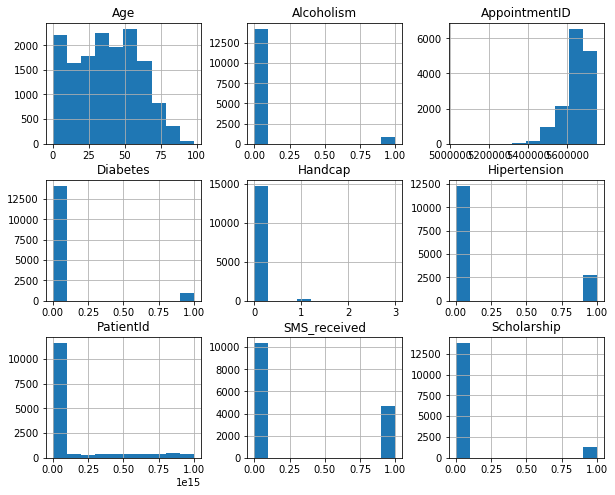

In [6]:
df.hist(figsize=(10,8));

### Data Cleaning

In [7]:
df[df.Neighbourhood.isnull()]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
15087,8.923188e+13,5692968,M,2016-05-12T16:56:32Z,2016-05-19T00:00:00Z,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### We have one row null values. The ideal thing to do is to drop it.

In [8]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15087 entries, 0 to 15086
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       15087 non-null  float64
 1   AppointmentID   15087 non-null  int64  
 2   Gender          15087 non-null  object 
 3   ScheduledDay    15087 non-null  object 
 4   AppointmentDay  15087 non-null  object 
 5   Age             15087 non-null  int64  
 6   Neighbourhood   15087 non-null  object 
 7   Scholarship     15087 non-null  float64
 8   Hipertension    15087 non-null  float64
 9   Diabetes        15087 non-null  float64
 10  Alcoholism      15087 non-null  float64
 11  Handcap         15087 non-null  float64
 12  SMS_received    15087 non-null  float64
 13  No-show         15087 non-null  object 
dtypes: float64(7), int64(2), object(5)
memory usage: 1.7+ MB


#### Next we can get rid of  the columns that are not important like the PatientID and the AppointmentID

In [10]:
df.drop(['PatientId','AppointmentID'], axis=1, inplace=True)

In [11]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No


#### Adding columns to show us the time, day of week, month, and week number will help us understand if date and time affects whether patients show up or not.

In [12]:
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']= pd.to_datetime(df['AppointmentDay'])

In [13]:
df['ScheduledDay']=df['ScheduledDay'].dt.hour
df['Weekday']=df['AppointmentDay'].dt.weekday
df['Month']=df['AppointmentDay'].dt.month

In [14]:
df.rename(columns={'ScheduledDay': 'time'},inplace=True)

In [15]:
df['No-show']=df['No-show'].apply(lambda x: 1 if x!='Yes' else 0)

#### Its better to divide the patients into different age groups:
0-12 children
13-18 Teenagers
19-29 Young Adults
30-59 Adults
60+ Elders

In [16]:
bins = [0, 13, 19, 30, 60, 120]
labels = ['0-12','13-18','19-29', '30-59', '60+']
df['Agegroup'] = pd.cut(df.Age, bins, labels = labels,include_lowest = True)

In [17]:
df.head()

,Gender,time,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Weekday,Month,Agegroup
0,F,18,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,1,4,4,60+
1,M,16,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,1,4,4,30-59
2,F,16,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,1,4,4,60+
3,F,17,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,1,4,4,0-12
4,F,16,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,1,4,4,30-59


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What is the effect of date and time on the patient's show up.

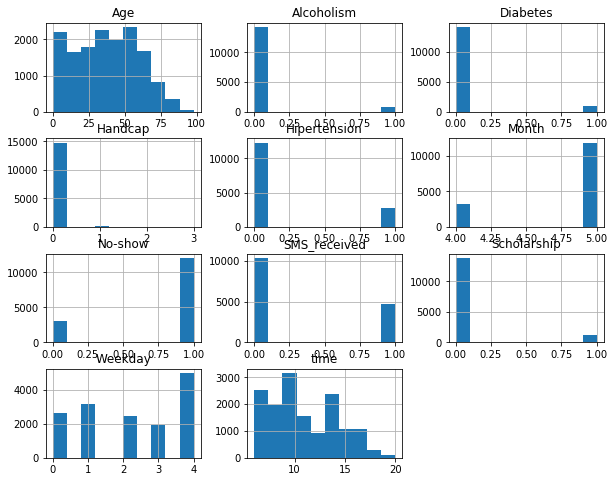

In [18]:
df.hist(figsize=(10,8));

In [19]:
show=df["No-show"]==0
no_show=df["No-show"]==1

### Relation between show up and time

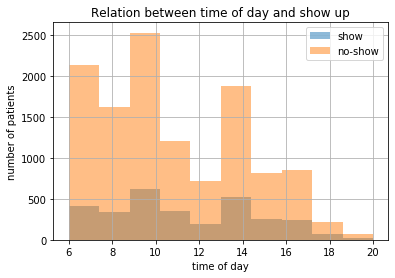

In [20]:
df.time[show].hist(alpha=0.5,bins=10,label='show')
df.time[no_show].hist(alpha=0.5,bins=10,label='no-show')
plt.title("Relation between time of day and show up")
plt.xlabel('time of day')
plt.ylabel('number of patients')
plt.legend();

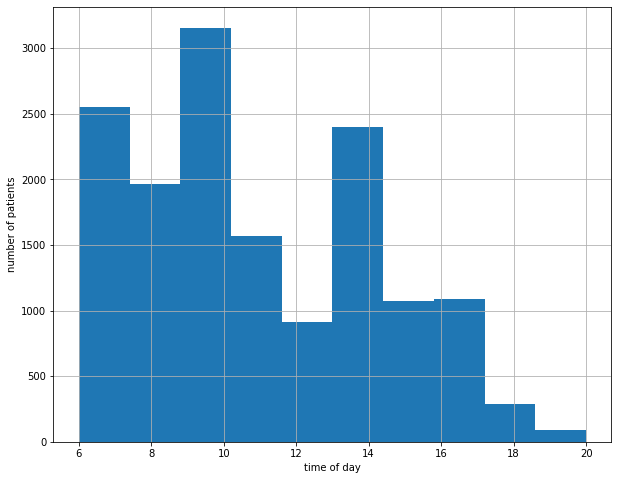

In [21]:
df.time.hist(figsize=(10,8))
plt.xlabel('time of day')
plt.ylabel('number of patients');

In [22]:
df.groupby('time')['No-show'].mean()

time
6     0.752727
7     0.849032
8     0.827393
9     0.825093
10    0.778790
11    0.773018
12    0.786652
13    0.782379
14    0.781028
15    0.760485
16    0.792424
17    0.759907
18    0.753472
19    0.740260
20    0.562500
Name: No-show, dtype: float64

In [23]:
df.time.value_counts()

7     2272
8     1964
9     1618
11    1564
10    1537
14    1265
13    1135
15    1073
12     914
16     660
17     429
18     288
6      275
19      77
20      16
Name: time, dtype: int64

<font color='green'>Regarding the time of the appointment. From the Data above the most showup percentage is at 20:00 yet 20:00 has only 16 appointments so we can't consider it. We can still conclude that appointments before 10 AM are more likely to be skiped.</font> 

### Relation between showup and day of week

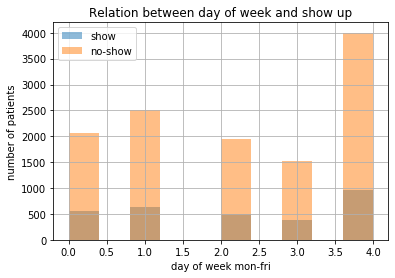

In [24]:
df.Weekday[show].hist(alpha=0.5,bins=10,label='show')
df.Weekday[no_show].hist(alpha=0.5,bins=10,label='no-show')
plt.title("Relation between day of week and show up")
plt.xlabel('day of week mon-fri')
plt.ylabel('number of patients')
plt.legend();

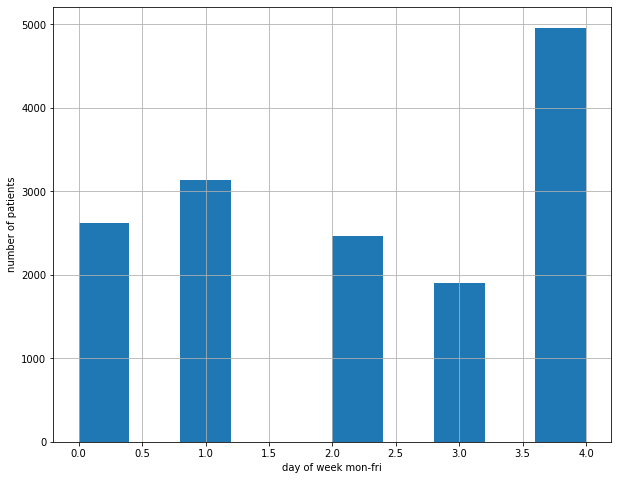

In [25]:
df.Weekday.hist(figsize=(10,8))
plt.xlabel('day of week mon-fri')
plt.ylabel('number of patients');

In [26]:
df.groupby('Weekday')['No-show'].mean()

Weekday
0    0.785687
1    0.797703
2    0.793580
3    0.802417
4    0.806328
Name: No-show, dtype: float64

In [27]:
df.Weekday.value_counts()

4    4962
1    3134
0    2627
2    2461
3    1903
Name: Weekday, dtype: int64

<font color='green'>Regarding weekdays, the day of week doesn't have a remarkable effect on the showup yet, patients tend to show up more in the beginning of the week</font> 

### Relation between showup and month

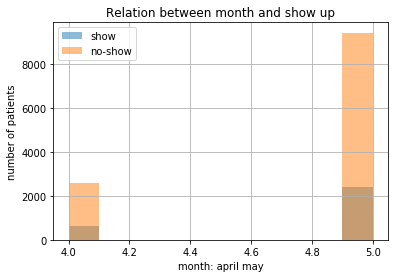

In [28]:
df.Month[show].hist(alpha=0.5,bins=10,label='show')
df.Month[no_show].hist(alpha=0.5,bins=10,label='no-show')
plt.title("Relation between month and show up")
plt.xlabel('month: april may')
plt.ylabel('number of patients')
plt.legend();

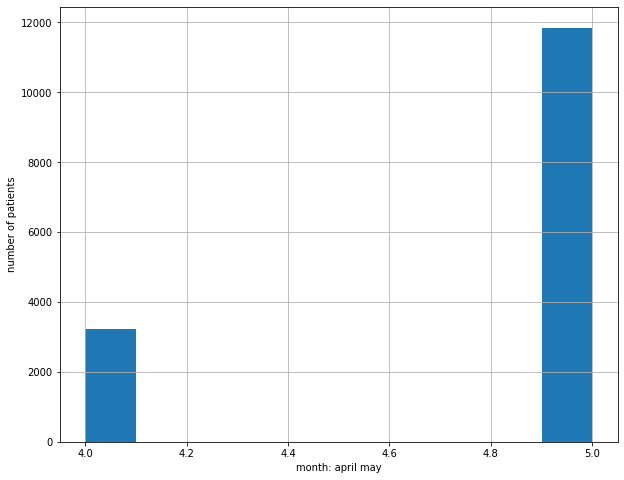

In [29]:
df.Month.hist(figsize=(10,8))
plt.xlabel('month: april may')
plt.ylabel('number of patients');

In [30]:
df.groupby('Month')['No-show'].mean()

Month
4    0.804328
5    0.796743
Name: No-show, dtype: float64

In [31]:
df.Month.value_counts()

5    11852
4     3235
Name: Month, dtype: int64

<font color='green'>For months, there isn't a relation between showing up and the month</font> 

### Research Question 2  :  Relation between the patient's characteristics and Showup

In [32]:
df.head()

,Gender,time,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Weekday,Month,Agegroup
0,F,18,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,1,4,4,60+
1,M,16,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,1,4,4,30-59
2,F,16,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,1,4,4,60+
3,F,17,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,1,4,4,0-12
4,F,16,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,1,4,4,30-59


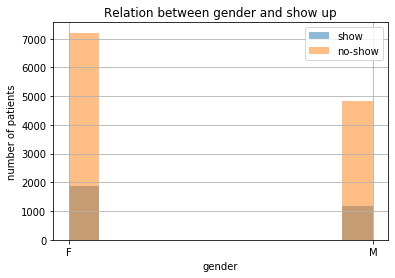

In [33]:
df.Gender[show].hist(alpha=0.5,bins=10,label='show')
df.Gender[no_show].hist(alpha=0.5,bins=10,label='no-show')
plt.title("Relation between gender and show up")
plt.xlabel('gender')
plt.ylabel('number of patients')
plt.legend();

In [34]:
df.groupby('Gender')['No-show'].mean()

Gender
F    0.793483
M    0.805764
Name: No-show, dtype: float64

In [35]:
df.Gender.value_counts()

F    9084
M    6003
Name: Gender, dtype: int64

<font color='green'>Given that the number of women patients is more than that of men, yet the percentage of them not showing up is very close</font> 

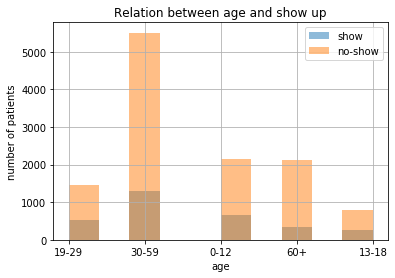

In [36]:
df.Agegroup[show].hist(alpha=0.5,bins=10,label='show')
df.Agegroup[no_show].hist(alpha=0.5,bins=10,label='no-show')
plt.title("Relation between age and show up")
plt.xlabel('age')
plt.ylabel('number of patients')
plt.legend();

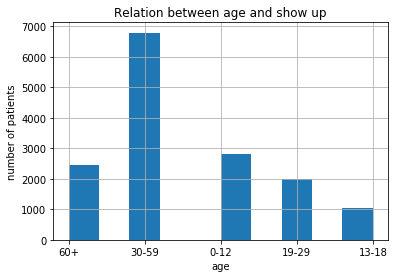

In [37]:
df['Agegroup'].hist(bins=10)
plt.title("Relation between age and show up")
plt.xlabel('age')
plt.ylabel('number of patients');

In [38]:
df.groupby('Agegroup')['No-show'].mean()

Agegroup
0-12     0.767153
13-18    0.757956
19-29    0.739394
30-59    0.810751
60+      0.864208
Name: No-show, dtype: float64

In [39]:
df.Agegroup.value_counts()

30-59    6790
0-12     2813
60+      2467
19-29    1980
13-18    1037
Name: Agegroup, dtype: int64

<font color='green'>Regarding the ages of the patients. Young Adults, teenagers, and children tend to show up more than Adults and elder patients</font> 

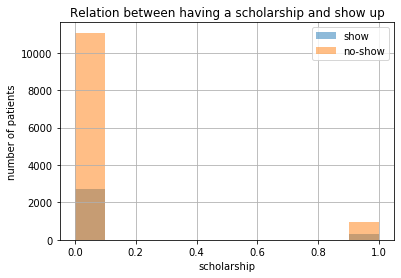

In [40]:
df.Scholarship[show].hist(alpha=0.5,bins=10,label='show')
df.Scholarship[no_show].hist(alpha=0.5,bins=10,label='no-show')
plt.title("Relation between having a scholarship and show up")
plt.xlabel('scholarship')
plt.ylabel('number of patients')
plt.legend();

In [41]:
df.groupby('Scholarship')['No-show'].mean()

Scholarship
0.0    0.801709
1.0    0.762166
Name: No-show, dtype: float64

<font color='green'> From the data above, we can conclude that people with no scolarships tend to not show up more than those with scholarships.</font>

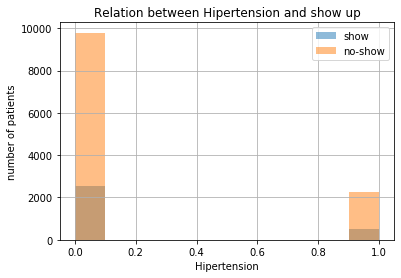

In [42]:
df.Hipertension[show].hist(alpha=0.5,bins=10,label='show')
df.Hipertension[no_show].hist(alpha=0.5,bins=10,label='no-show')
plt.title("Relation between Hipertension and show up")
plt.xlabel('Hipertension')
plt.ylabel('number of patients')
plt.legend();

In [43]:
df.groupby('Hipertension')['No-show'].mean()

Hipertension
0.0    0.793674
1.0    0.819369
Name: No-show, dtype: float64

<font color='green'> From the data above, we can conclude that people with hypertension tend to miss their appointment more than those without.</font>

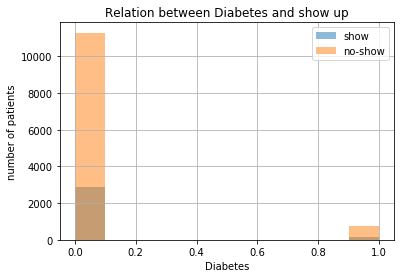

In [44]:
df.Diabetes[show].hist(alpha=0.5,bins=10,label='show')
df.Diabetes[no_show].hist(alpha=0.5,bins=10,label='no-show')
plt.title("Relation between Diabetes and show up")
plt.xlabel('Diabetes')
plt.ylabel('number of patients')
plt.legend();

In [45]:
df.groupby('Diabetes')['No-show'].mean()

Diabetes
0.0    0.797287
1.0    0.814775
Name: No-show, dtype: float64

<font color='green'> From the data above, we can conclude that people with diabetes tend to miss their appointment more than those without.</font>

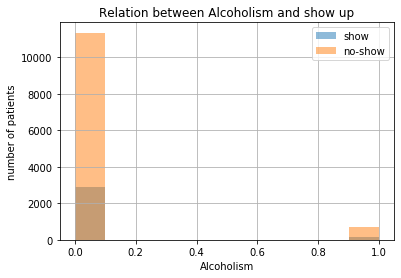

In [46]:
df.Alcoholism[show].hist(alpha=0.5,bins=10,label='show')
df.Alcoholism[no_show].hist(alpha=0.5,bins=10,label='no-show')
plt.title("Relation between Alcoholism and show up")
plt.xlabel('Alcoholism')
plt.ylabel('number of patients')
plt.legend();

In [47]:
df.groupby('Alcoholism')['No-show'].mean()

Alcoholism
0.0    0.795767
1.0    0.843712
Name: No-show, dtype: float64

<font color='green'> From the data above, we can conclude that 
People with alcoholism tend to miss their appointment more than those without.</font>

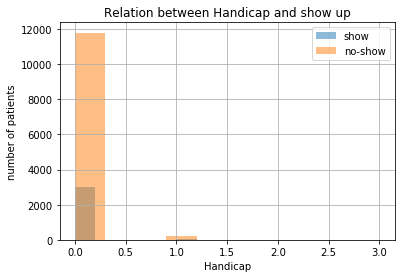

In [48]:
df.Handcap[show].hist(alpha=0.5,bins=10,label='show')
df.Handcap[no_show].hist(alpha=0.5,bins=10,label='no-show')
plt.title("Relation between Handicap and show up")
plt.xlabel('Handicap')
plt.ylabel('number of patients')
plt.legend();

In [49]:
df.groupby('Handcap')['No-show'].mean()

Handcap
0.0    0.797202
1.0    0.859259
2.0    0.833333
3.0    1.000000
Name: No-show, dtype: float64

In [50]:
df.Handcap.value_counts()

0.0    14798
1.0      270
2.0       18
3.0        1
Name: Handcap, dtype: int64

<font color='green'> From the data above, we can conclude that there is a huge difference in the number of people who are handcaped and who aren't therefor concluding from this data wouldn't be precise.</font>

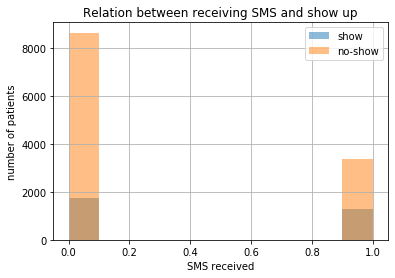

In [51]:
df.SMS_received[show].hist(alpha=0.5,bins=10,label='show')
df.SMS_received[no_show].hist(alpha=0.5,bins=10,label='no-show')
plt.title("Relation between receiving SMS and show up")
plt.xlabel('SMS received')
plt.ylabel('number of patients')
plt.legend();

In [52]:
df.groupby('SMS_received')['No-show'].mean()

SMS_received
0.0    0.832676
1.0    0.722412
Name: No-show, dtype: float64

<font color='green'> From the data above, we can conclude that people with no scolarships tend to not show up more than those with scholarships.
People with hypertension tend to miss their appointment more than those without.
Similarily for those with diabetes and alcoholism.
Regarding handcap, there is a huge difference in the number of people who are handcaped and who aren't therefor concluding from this data wouldn't be precise.
finally people who receive sms tend to show up more than those who don't receive.</font>

In [53]:
df.groupby('Neighbourhood')['No-show'].mean()

Neighbourhood
ANDORINHAS             0.784091
ANTÔNIO HONÓRIO        0.687500
ARIOVALDO FAVALESSA    0.739130
BARRO VERMELHO         0.755556
BELA VISTA             0.804100
                         ...   
SÃO JOSÉ               0.809091
SÃO PEDRO              0.757764
TABUAZEIRO             0.791304
UNIVERSITÁRIO          0.909091
VILA RUBIM             0.782178
Name: No-show, Length: 78, dtype: float64

In [54]:
df.groupby('Neighbourhood')['No-show'].mean().describe()

count    78.000000
mean      0.806817
std       0.066448
min       0.600000
25%       0.774223
50%       0.803689
75%       0.844004
max       1.000000
Name: No-show, dtype: float64

<font color='green'>Finally since there is a huge number of neighborhood, the data will not fit in a histogram. There is some difference in the percentage of people showing up or not due to the location the range is between 60% to 100% no show up with a standard deviation of 6%</font>

<a id='conclusions'></a>
## Conclusions

As a summary, this report analyses the factors that affects patients presence for an appointment. The size of data is basically sufficient to judge an answer question based on time relation, gender, and the age of patients where:

#### Patients relatively tend to come to appointments after 10 AM and at the beginning of the week rather than before 10 AM and later in the week.

#### Missing out on an appointment doesn't deffer much from gender to another, yet older patients tend to miss there apointments more often than younger ones.


Yet if we want to consider the chronic diseases:

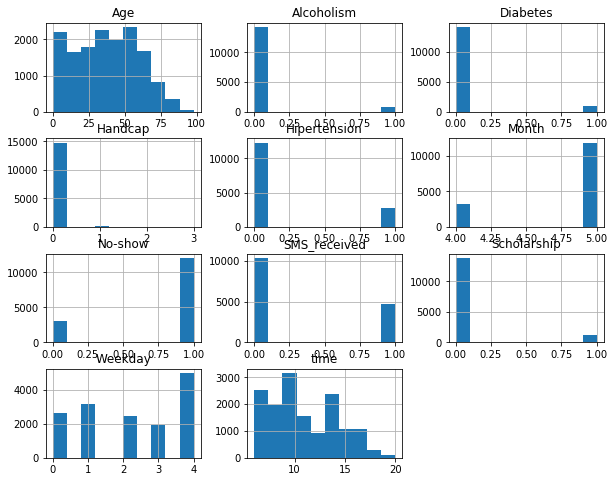

In [55]:
df.hist(figsize=(10,8));

#### Regarding Chronic Diseases, the size of the data isn't sufficient where we don't have enough data to compare the ones with chronic diseases (small number) to those without (large number). A better view regarding those would be achieved if we get more data regarding people with chronic diseases.

from the given data we can assume that people with chronic disease tend to miss their appointment more than people without. Moreover, people with scholarship tend to show up to their appointment more than people without.
##### Still the number differs alot in those cases so we cannot conclude for sure.

#### Finally a problem regarding concluding how the neighbourhoods affects showing up is due to the large diversity of the Neighbourhoods which makes it impossible to find a relation. A solution for that is to distribute the neighbourhoods in the cities they belong in thus a relation between each city and showing up would be more feasible